In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor
from skimage import io
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.signal import savgol_filter
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq
from scipy.signal import savgol_filter
%matplotlib nbagg

## box size effect on spatial intensity correlation

In [3]:
def boxsize_effect_spatial(img, boxsize, mpp):
    # img: the image to be tested, array-like
    # boxsize: a list of boxsize to be tested, list-like
    # mpp: microns per pixel, float
    data = {}
    for bs in boxsize:
        X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
        CI = corrI(X, Y, I)
        dc = distance_corr(X, Y, CI)
        bsm = bs * mpp # boxsize in microns
        dc.R = dc.R * mpp
        data['{0:.1f}'.format(bsm)] = dc
    for kw in data:
        dc = data[kw]
        length = len(dc)
        smooth_length = int(np.ceil(length/5)*2+1)
        plt.plot(dc.R, savgol_filter(dc.C, smooth_length, 3), label=kw)
    plt.legend()
    return data

<IPython.core.display.Javascript object>


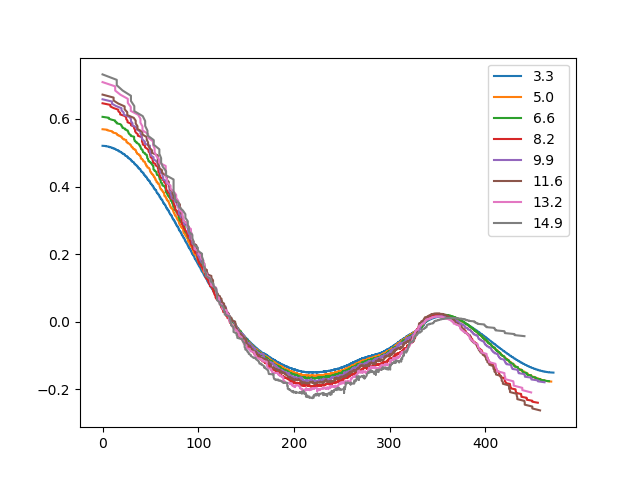

In [9]:
%matplotlib nbagg
img = io.imread(r'E:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = range(10, 50, 5)
mpp= 0.33
data = boxsize_effect_spatial(img, boxsize, mpp)

## Giant number fluctuation analysis

In [37]:
img = io.imread(r'E:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = np.unique(np.floor(np.logspace(0, 2.5, 100)))
NList = []
dNList = []
for bs in boxsize:
    X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
    N = (255-I.mean())*bs*bs
    dN = I.std()*bs*bs
    NList.append(N)
    dNList.append(dN)

<IPython.core.display.Javascript object>


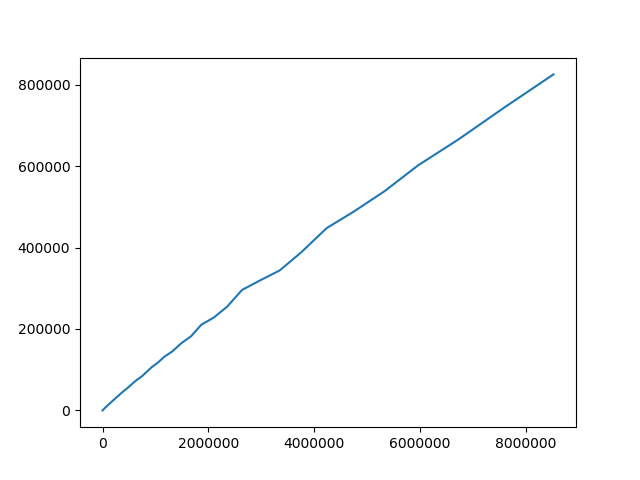

In [38]:
plt.plot(NList, dNList)

<IPython.core.display.Javascript object>


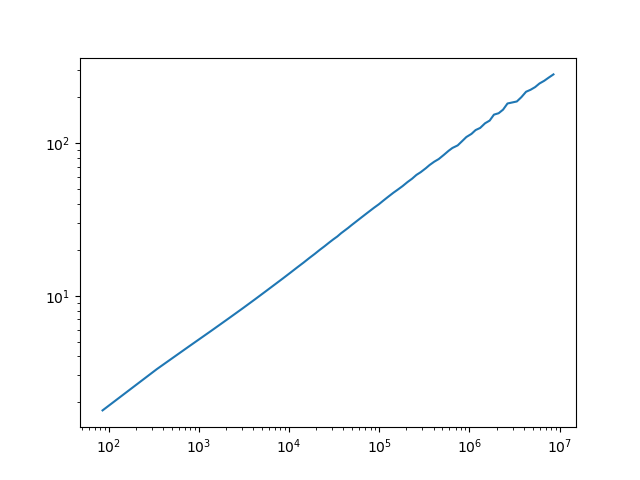

In [40]:
n = np.array(NList)
d = np.array(dNList)
plt.plot(n, d/n**.5)
plt.xscale('log')
plt.yscale('log')

In [42]:
np.log10(10)

1.0